# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Benjamin Wu
### Student ID: 013607880
### Email address: benjamin.wu01@sjsu.edu

##  <u>References and sources </u>

https://www.geeksforgeeks.org/add-a-new-column-in-pandas-data-frame-using-a-dictionary/


##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [144]:
np.random.seed(42)

colors = {"Breast": '#4287f5',
 "Bladder": '#19c5e3',
 "Colon": '#80d941',
 "Glioblastoma": '#179933',
 "Head&Neck": '#f07e78',
 "Kidney": '#f01e13',
 "Leukemia": '#f0841f',
 "LungAdeno": '#db5209',
 "LungSquamous": '#ce8ced',
 "Ovarian": '#551075',
 "Rectal": '#e3d329',
 "Uterine": '#cc3423'
 }


#### Code the solution

#### Loading data

In [145]:
df = pd.read_csv("homework4_input_data.csv")

#### Plot PCA

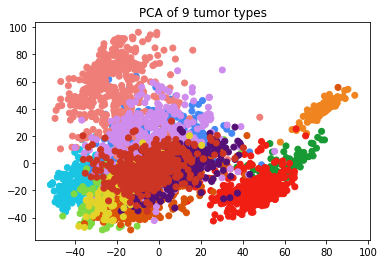

In [146]:
pca = PCA(n_components = 2).fit_transform(df.iloc[:,1:-1])
pdf = pd.DataFrame(data=pca, columns=["X", "Y"])
classdf = df.Class
pdf = pd.concat([pdf, classdf], axis=1)
pdf["Color"] = pdf["Class"].map(colors)
plt.scatter(pdf.X, pdf.Y, color=pdf.Color)
plt.title("PCA of 9 tumor types")
plt.show()


#### Normalize data, break into sets, and perform cross-validation

In [147]:
X = df.iloc[:,1:-1]
Y = df.Class

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify=Y)

model = LinearSVC(multi_class='ovr', class_weight='balanced')

results = cross_val_score(model, X_train, Y_train)

#### Cross-validation results

In [148]:
print("Individual cross-validation accuracies: " + str(results))
total = 0
for i in results:
    total = total + i
total = total / len(results)

print("Mean cross validation accuracy: {:.5f}".format(total))

Individual cross-validation accuracies: [0.96 0.97 0.96 0.97 0.97]
Mean cross validation accuracy: 0.96396


#### Training final model, computing accuracy, and plotting confusion matrices

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.98


C:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


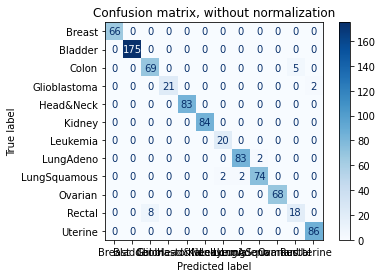

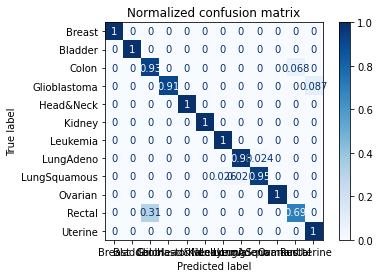

In [149]:
model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))
print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))


np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=colors.keys(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()